### Columns/Features
Country - Country

Year - Year

Status- Developed or Developing status

Life expectancy - Life Expectancy in age

Adult Mortality - Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

infant deaths - Number of Infant Deaths per 1000 population

Alcohol- Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol) percentage

Expenditure - Expenditure on health as a percentage of Gross Domestic Product per capita(%)

Hepatitis B - Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

Measles - number of reported cases per 1000 population

BMI - Average Body Mass Index of entire population

under-five deaths - Number of under-five deaths per 1000 population

Polio - Polio (Pol3) immunization coverage among 1-year-olds (%)

Total expenditure - General government expenditure on health as a percentage of total government expenditure (%)

Diphtheria - Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

HIV/AIDS - Deaths per 1 000 live births HIV/AIDS 

GDP - Gross Domestic Product per capita (in USD)

Population - Population of the country

thinness - 1-19 years Prevalence of thinness among children and adolescents for Age 10 to 19 (% )

thinness - 5-9 years Prevalence of thinness among children for Age 5 to 9(%)

Income - composition of resources Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

Schooling - Number of years of Schooling(years)

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import math
import seaborn as sns



In [106]:
data=pd.read_csv("LifeExpectancyData.csv")

In [107]:
data.head()

,Country,Year,Status,Life_expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life_expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [109]:
"""counting the no. of null values"""
print(data.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [110]:
"""Repalcing null values with median"""
data.fillna(data.median(),inplace = True)
print(data.isnull().sum())

Country                            0
Year                               0
Status                             0
Life_expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


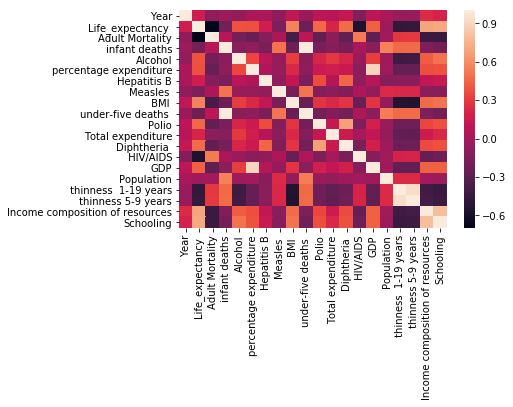

In [111]:
"""Plotting correlations among variables of dataset"""
sns.heatmap(data.corr())

In [155]:
"""For Simple_Linear_Regression just take GDP as independent variable"""
x=data.iloc[:,[16]]
y=data.iloc[:,[3]]

In [113]:
"""Spitting dataset into training set and test set"""
training_x,testing_x,training_y,testing_y=train_test_split(x,y,test_size=.3,random_state=102)

In [114]:
lin=LinearRegression()

In [115]:
lin.fit(training_x,training_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [116]:
pred_y=lin.predict(testing_x)

### """Error Calculation"""###

In [117]:
MAE=metrics.mean_absolute_error(testing_y,pred_y)
print(MAE)

7.03143598616585


In [118]:
MSE=metrics.mean_squared_error(testing_y,pred_y)
print(MSE)

76.20551809645391


In [119]:
RMSE=math.sqrt(metrics.mean_squared_error(testing_y,pred_y))
print(RMSE)

8.72957720033


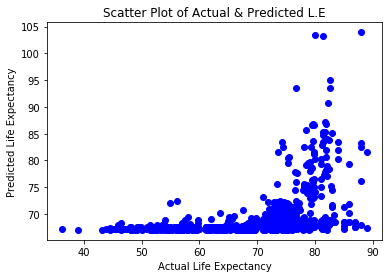

In [120]:
"""Visualising the Results"""
plt.scatter(testing_y,pred_y,color="b")
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Scatter Plot of Actual & Predicted L.E")
plt.show()

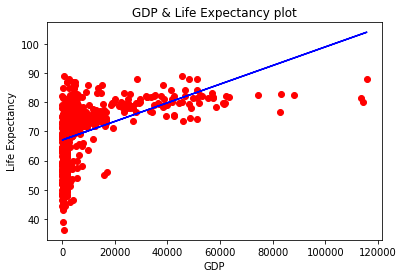

In [121]:
plt.scatter(testing_x,testing_y,color="r")
plt.plot(testing_x,pred_y,color='b')
plt.xlabel("GDP")
plt.ylabel("Life Expectancy")
plt.title("GDP & Life Expectancy plot")
plt.show()

In [122]:
"""Accuracy of the model"""
print(lin.score(testing_x,testing_y))

0.17263925432695004


### """First model has been completed which is simple_linear_Regression"""###


In [130]:
"""Next model is Multiple_Linear_Regression"""
x=data.iloc[:,4:22]
y=data.iloc[:,[3]]

In [131]:
"""Spitting dataset into training set and test set"""
training_x,testing_x,training_y,testing_y=train_test_split(x,y,test_size=0.3,random_state=102)


In [132]:
ml=LinearRegression()

In [133]:
ml.fit(training_x,training_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [134]:
pred_y=ml.predict(testing_x)

### """Error Calculation"""###

In [135]:
MAE=metrics.mean_absolute_error(testing_y,pred_y)
print(MAE)

3.0994120957527937


In [136]:
MSE=metrics.mean_squared_error(testing_y,pred_y)
print(MSE)

17.003542589446255


In [137]:
RMSE=math.sqrt(metrics.mean_squared_error(testing_y,pred_y))
print(RMSE)

4.12353520531


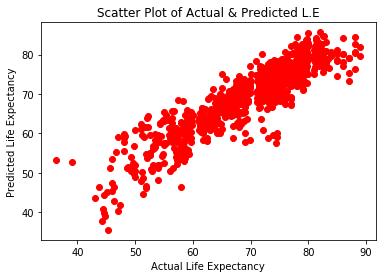

In [138]:
"""Visualising the Results"""
plt.scatter(testing_y,pred_y,color="r")
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Scatter Plot of Actual & Predicted L.E")
plt.show()

In [139]:
"""Accuracy of the model"""
ml.score(testing_x,testing_y)

0.8153931102721241

### """Second model has been completed which is multiple_linear_Regression"""###


In [142]:
"""Next model is Random_Forest"""
x=data.iloc[:,4:22]
y=data.iloc[:,[3]]

In [143]:
"""Spitting dataset into training set and test set"""
training_x,testing_x,training_y,testing_y=train_test_split(x,y,test_size=.3,random_state=102)

In [144]:
rf=RandomForestRegressor(n_estimators=200,random_state=102)

In [145]:
rf.fit(training_x,training_y)

C:\Users\mr.singh\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=102, verbose=0, warm_start=False)

In [146]:
pred_y=rf.predict(testing_x)

### """Error Calculation"""###

In [147]:
MAE=metrics.mean_absolute_error(testing_y,pred_y)
print(MAE)

1.2276167800453506


In [148]:
MSE=metrics.mean_squared_error(testing_y,pred_y)
print(MSE)

3.8440570379818517


In [149]:
RMSE=math.sqrt(metrics.mean_squared_error(testing_y,pred_y))
print(RMSE)

1.96062669521


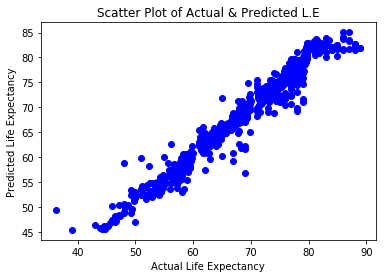

In [150]:
"""Visualising the Results"""
plt.scatter(testing_y,pred_y,color="b")
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Scatter Plot of Actual & Predicted L.E")
plt.show()

In [151]:
"""Accuracy of the model"""
rf.score(testing_x,testing_y)

0.9582652020903667

### """Third model has been completed which is Random_Forest"""###


In [77]:
"""Next model is ARIMA the time-series forcasting model"""
from statsmodels.tsa.arima_model import ARIMA

In [78]:
I_data=pd.read_csv("Life Expectancy Data India.csv")

In [79]:
I_data.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2000,62.5,224.0,1800,0.93,19.266157,NaN,38835,11.4,2500,57,4.26,58,0.3,438.864634,1535912,27.7,28.6,0.489,8.3
1,2001,62.9,222.0,1800,1.00,19.003406,NaN,51780,11.8,2400,58,4.50,59,0.3,447.138966,171477855,27.5,28.5,0.494,8.3
2,2002,63.3,219.0,1700,1.10,17.812056,NaN,40044,12.2,2300,58,4.40,59,0.3,466.284200,18987112,27.4,28.4,0.499,8.4
3,2003,63.7,216.0,1700,1.19,19.480868,NaN,47147,12.6,2200,57,4.30,61,0.3,541.135228,11827848,27.3,28.3,0.505,8.6
4,2004,64.0,214.0,1600,1.20,27.338009,6.0,55443,13.0,2100,58,4.22,63,0.3,621.318377,1126135777,27.2,28.2,0.518,9.2


In [80]:
d=I_data.iloc[:,[0,1]]

In [81]:
d

,Year,Life expectancy
0,2000,62.5
1,2001,62.9
2,2002,63.3
3,2003,63.7
4,2004,64.0
5,2005,64.4
6,2006,64.8
7,2007,65.2
8,2008,65.5
9,2009,66.0


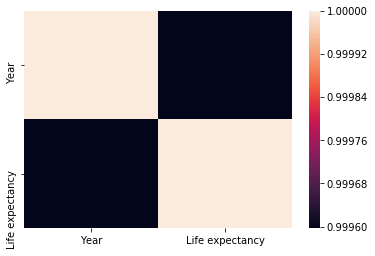

In [82]:
sns.heatmap(d.corr())

In [83]:
d.set_index('Year',inplace=True)

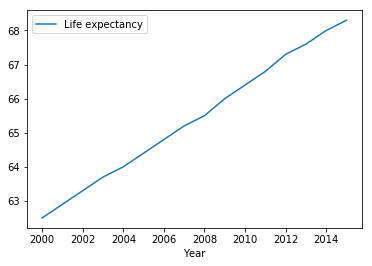

In [84]:
d.plot()

In [85]:
d

,Life expectancy
Year,
2000,62.5
2001,62.9
2002,63.3
2003,63.7
2004,64.0
2005,64.4
2006,64.8
2007,65.2
2008,65.5


In [86]:
d.describe()

,Life expectancy
count,16.000000
mean,65.418750
std,1.866626
min,62.500000
25%,63.925000
50%,65.350000
75%,66.925000
max,68.300000


In [87]:
"""Order-1 differencing"""
d_stat=d.diff()

In [88]:
d_stat

,Life expectancy
Year,
2000,NaN
2001,0.4
2002,0.4
2003,0.4
2004,0.3
2005,0.4
2006,0.4
2007,0.4
2008,0.3


In [89]:
"""To drop nan values after differencing"""
d_stat.dropna(inplace=True)

In [90]:
d_stat

,Life expectancy
Year,
2001,0.4
2002,0.4
2003,0.4
2004,0.3
2005,0.4
2006,0.4
2007,0.4
2008,0.3
2009,0.5


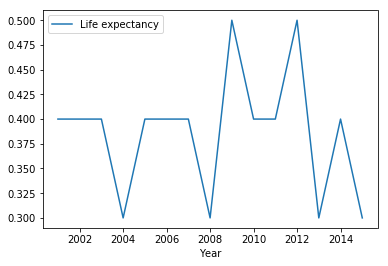

In [91]:
"""Plotting differentiated Data"""
d_stat.plot()

In [92]:
x=d.values

In [93]:
d_train=x[0:10]
d_test=x[10:]

In [94]:
d_train

array([[62.5],
       [62.9],
       [63.3],
       [63.7],
       [64. ],
       [64.4],
       [64.8],
       [65.2],
       [65.5],
       [66. ]])

In [95]:
"""Fitting the ARIMA model on data"""
model=ARIMA(d_train,order=(1,1,1))


In [96]:
model_fit=model.fit()

In [97]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                    9
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  16.596
Method:                       css-mle   S.D. of innovations              0.032
Date:                Fri, 08 Jan 2021   AIC                            -25.191
Time:                        21:28:09   BIC                            -24.402
Sample:                             1   HQIC                           -26.894
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3795      0.003    134.994      0.000       0.374       0.385
ar.L1.D.y     -0.4801      0.362     -1.327      0.233      -1.189       0.229
ma.L1.D.y     -1.0000      0.330     -3.029      0.023      -1.647      -0.353
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.0830           +0.0000j            2.0830            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [98]:
forecast=model_fit.forecast(steps=6)[0]

In [99]:
forecast

array([66.28088552, 66.70771394, 67.06447978, 67.45488046, 67.82913411,
       68.21113943])

In [100]:
"""Print Testing Data"""
d_test

array([[66.4],
       [66.8],
       [67.3],
       [67.6],
       [68. ],
       [68.3]])

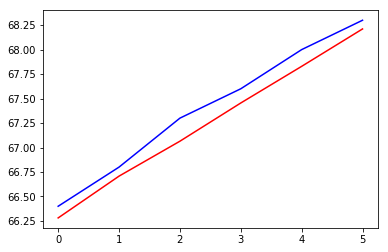

In [101]:
"""Visualising the Results"""
plt.plot(d_test,color='blue')
plt.plot(forecast,color='red')

### """Error Calculation"""###

In [102]:
MAE=metrics.mean_absolute_error(d_test,forecast)
print(MAE)

0.14196112733651015


In [103]:
MSE=metrics.mean_squared_error(d_test,forecast)
print(MSE)

0.022720964459133904


In [104]:
RMSE=math.sqrt(metrics.mean_squared_error(d_test,forecast))
print(RMSE)

0.150734748678


### """Forcasting model has been completed which is ARIMA"""###
### """ThankYou"""###